## Observations and Insights

* Comment

## Dependencies and starter code

In [173]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse = "C:/Users/Laptop/Desktop/GT-ATL-DATA-PT-12-2019-U-C/Homework/05-Matplotlib/Instructions/Pymaceuticals/data/Mouse_metadata.csv"
results = "C:/Users/Laptop/Desktop/GT-ATL-DATA-PT-12-2019-U-C/Homework/05-Matplotlib/Instructions/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse)
results_df = pd.read_csv(results)

In [174]:
#mouse_df.head()

In [175]:
#results_df.head()

In [176]:
# Combine the data into a single dataset
merged_df = pd.merge(mouse_df, results_df, on="Mouse ID")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [177]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = pd.DataFrame(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean())
mean = mean.rename(columns={"Tumor Volume (mm3)":" Mean Tumor Volume"})

median = pd.DataFrame(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median())
median = median.rename(columns={"Tumor Volume (mm3)":" Median Tumor Volume"})

var = pd.DataFrame(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].var())
var = var.rename(columns={"Tumor Volume (mm3)":" Variance Tumor Volume"})

stdev = pd.DataFrame(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std())
stdev = stdev.rename(columns={"Tumor Volume (mm3)":" StDev Tumor Volume"})

sem = pd.DataFrame(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem())
sem = sem.rename(columns={"Tumor Volume (mm3)":" SEM Tumor Volume"})

stat_merge = pd.merge(mean, median, on="Drug Regimen")
stat_merge = pd.merge(stat_merge, var, on="Drug Regimen")
stat_merge = pd.merge(stat_merge, stdev, on="Drug Regimen")
stat_merge = pd.merge(stat_merge, sem, on="Drug Regimen")
stat_merge

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,StDev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [178]:
count = pd.DataFrame(merged_df.groupby(['Drug Regimen'])["Mouse ID"].count())
count = count[["Mouse ID"]]

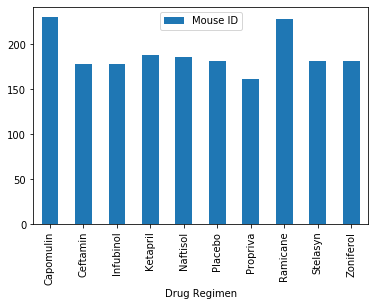

In [179]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count.plot.bar()

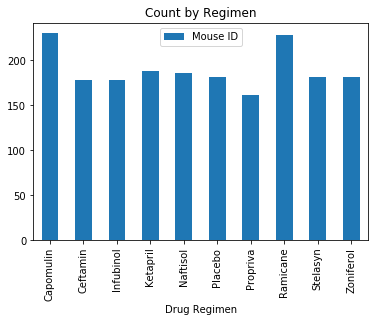

In [180]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
count.plot(kind="bar")
plt.title("Count by Regimen")
plt.show()

## Pie Plots

In [181]:
gender = pd.DataFrame(merged_df.groupby(['Sex'])["Mouse ID"].count())
gender = gender[["Mouse ID"]]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B35F2A5888>],
      dtype=object)

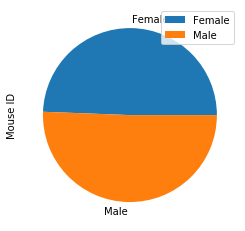

In [182]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender.plot.pie(subplots=True)

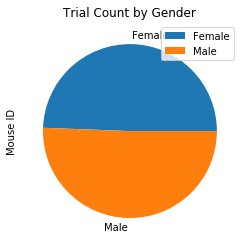

In [183]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender.plot(kind="pie",subplots=True)
plt.title("Trial Count by Gender")
plt.show()

## Quartiles, outliers and boxplots

In [184]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
tumorvol = pd.DataFrame(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sum())
tumorvol = tumorvol.sort_values("Tumor Volume (mm3)", ascending=True)
tumorvol = tumorvol.nsmallest(4,'Tumor Volume (mm3)')
tumorvol

,Tumor Volume (mm3)
Drug Regimen,
Propriva,8423.930878
Ramicane,9169.417875
Capomulin,9355.420462
Ceftamin,9361.228582


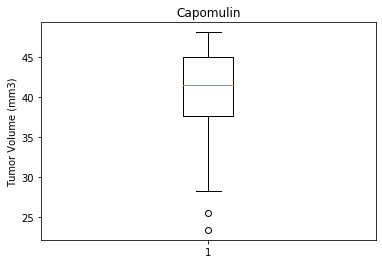

In [185]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]

Q1 = np.percentile(capomulin['Tumor Volume (mm3)'], 25)
Q2 = np.percentile(capomulin['Tumor Volume (mm3)'], 50)
Q3 = np.percentile(capomulin['Tumor Volume (mm3)'], 75)
IQR = Q3 - Q1
upper_boundary = Q3 + (1.5 * IQR)
lower_boundary = Q1 - (1.5 * IQR)

#print("(Q1) Lower Quartile: %s"%(Q1))
#print("(Q2) Median: %s"%(Q2))
#print("(Q3) Upper Quartile: %s"%(Q3))
#print("Interquartile Range: %s"%(IQR))
#print("Upper Boundary: %s"%(upper_boundary))
#print("Lower Boundary: %s"%(lower_boundary))

cap_tumors = capomulin['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(cap_tumors)
plt.show()

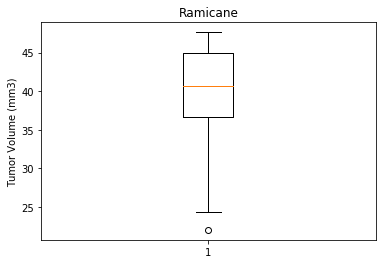

In [186]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ramicane = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane"]

Q1 = np.percentile(ramicane['Tumor Volume (mm3)'], 25)
Q2 = np.percentile(ramicane['Tumor Volume (mm3)'], 50)
Q3 = np.percentile(ramicane['Tumor Volume (mm3)'], 75)
IQR = Q3 - Q1
upper_boundary = Q3 + (1.5 * IQR)
lower_boundary = Q1 - (1.5 * IQR)

#print("(Q1) Lower Quartile: %s"%(Q1))
#print("(Q2) Median: %s"%(Q2))
#print("(Q3) Upper Quartile: %s"%(Q3))
#print("Interquartile Range: %s"%(IQR))
#print("Upper Boundary: %s"%(upper_boundary))
#print("Lower Boundary: %s"%(lower_boundary))

ram_tumors = ramicane['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ram_tumors)
plt.show()

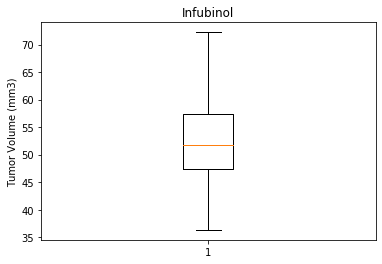

In [187]:
infubinol = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol"]

Q1 = np.percentile(infubinol['Tumor Volume (mm3)'], 25)
Q2 = np.percentile(infubinol['Tumor Volume (mm3)'], 50)
Q3 = np.percentile(infubinol['Tumor Volume (mm3)'], 75)
IQR = Q3 - Q1
upper_boundary = Q3 + (1.5 * IQR)
lower_boundary = Q1 - (1.5 * IQR)

#print("(Q1) Lower Quartile: %s"%(Q1))
#print("(Q2) Median: %s"%(Q2))
#print("(Q3) Upper Quartile: %s"%(Q3))
#print("Interquartile Range: %s"%(IQR))
#print("Upper Boundary: %s"%(upper_boundary))
#print("Lower Boundary: %s"%(lower_boundary))

inf_tumors = infubinol['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(inf_tumors)
plt.show()

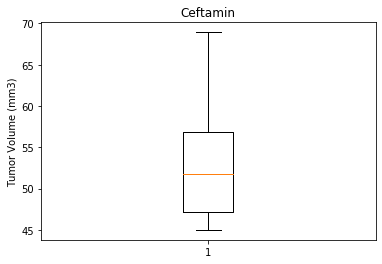

In [191]:
ceftamin = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin"]

Q1 = np.percentile(ceftamin['Tumor Volume (mm3)'], 25)
Q2 = np.percentile(ceftamin['Tumor Volume (mm3)'], 50)
Q3 = np.percentile(ceftamin['Tumor Volume (mm3)'], 75)
IQR = Q3 - Q1
upper_boundary = Q3 + (1.5 * IQR)
lower_boundary = Q1 - (1.5 * IQR)

#print("(Q1) Lower Quartile: %s"%(Q1))
#print("(Q2) Median: %s"%(Q2))
#print("(Q3) Upper Quartile: %s"%(Q3))
#print("Interquartile Range: %s"%(IQR))
#print("Upper Boundary: %s"%(upper_boundary))
#print("Lower Boundary: %s"%(lower_boundary))

cef_tumors = ceftamin['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(cef_tumors)
plt.show()

## Line and scatter plots

In [188]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [189]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [190]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen